### 225229146 - VINITHA V

## Lab5- Text corpus creation and binary classification using DNN

### Step 1: Dataset Creation:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('lines_data.csv')
data.head(5)

,SNO,LINES,LABEL
0,1,எத்தனை கைகள் என்னை தள்ளிவிட்டாலும் என் நம்பிக்...,0
1,2,சந்தேகத்தை எரித்துவிடு நம்பிக்கையை விதைத்துவிட...,0
2,3,துன்பம் நம்மை சூழ்ந்த போதும் மேகம் கலைந்த வானம...,0
3,4,தனித்து போராடி கரைசேர்ந்த பின் திமிராய் இருப்ப...,0
4,5,முட்களையும் ரசிக்க கற்றுக்கொள் வலிகளும் பழகிப்...,0


In [3]:
data.shape

(38, 3)

In [4]:
data.groupby('LABEL').count()

,SNO,LINES
LABEL,,
0,20,20
1,18,18


### Step 2: Pre-processing:

In [5]:
x = data["LINES"]
y = data["LABEL"]

In [6]:
import nltk
from nltk.stem import WordNetLemmatizer

In [7]:
lemmatizer=WordNetLemmatizer()

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PTV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PTV\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
stop=stopwords.words('english')
def clean_review(review):
    tokens = review.lower().split()
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop]
    return " ".join(filtered_tokens)

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PTV\AppData\Roaming\nltk_data...


True

In [14]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PTV\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
import pandas as pd

In [21]:
temp = x.tolist()
fax = []
for i in temp:
    fax.append(clean_review(i))

n_X = pd.Series(fax)


In [23]:
import string
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(n_X)
feature_names = tfidf.get_feature_names_out()

text_vect = pd.DataFrame(vectors.toarray(), columns=feature_names)
text_vect

,அட,அத,அந,அன,அரச,அல,அளவ,அழ,அழக,அவ,...,றம,றவ,லத,லம,ளத,ளம,வத,வம,வர,வல
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.446513
5,0.000000,0.374742,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.481661,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.4254,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
import tensorflow as tf
temp = tf.Variable(text_vect)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(text_vect,y,train_size=0.75,test_size=0.25)

In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense,Activation

In [32]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               13312     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 2)                 18        
                                                                 
Total params: 24330 (95.04 KB)
Trainable params: 24330

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, verbose=2, validation_split=0.2, batch_size=15)

Epoch 1/100
2/2 - 1s - loss: 0.6883 - accuracy: 0.5909 - val_loss: 0.6968 - val_accuracy: 0.3333 - 933ms/epoch - 467ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6732 - accuracy: 0.6364 - val_loss: 0.6969 - val_accuracy: 0.5000 - 25ms/epoch - 13ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6572 - accuracy: 0.6364 - val_loss: 0.6977 - val_accuracy: 0.5000 - 33ms/epoch - 17ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6420 - accuracy: 0.6818 - val_loss: 0.6976 - val_accuracy: 0.5000 - 33ms/epoch - 16ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6258 - accuracy: 0.8182 - val_loss: 0.6975 - val_accuracy: 0.3333 - 17ms/epoch - 9ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6098 - accuracy: 0.8636 - val_loss: 0.6952 - val_accuracy: 0.3333 - 31ms/epoch - 15ms/step
Epoch 7/100
2/2 - 0s - loss: 0.5910 - accuracy: 0.8636 - val_loss: 0.6909 - val_accuracy: 0.3333 - 35ms/epoch - 17ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5691 - accuracy: 0.8636 - val_loss: 0.6861 - val_accuracy: 0.5000 - 13ms/epoch - 7ms/step
Epoch 9/100
2/2 - 0s - l

In [35]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.2511 - accuracy: 0.9000


[0.2511425018310547, 0.8999999761581421]

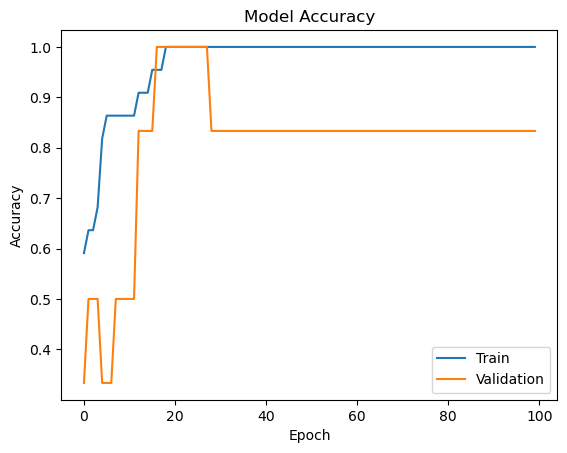

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Corrected key name to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [39]:
model2 = Sequential()
model2.add(Dense(512,activation='relu',input_dim=X_train.shape[1]))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(2,activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               53248     
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 2)                 130       
                                                                 
Total params: 225858 (882.26 KB)
Trainable params: 225858 (882.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model2.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 1s - loss: 0.6812 - accuracy: 0.5909 - val_loss: 0.6991 - val_accuracy: 0.3333 - 580ms/epoch - 290ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6064 - accuracy: 0.6818 - val_loss: 0.6832 - val_accuracy: 0.3333 - 44ms/epoch - 22ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5298 - accuracy: 0.9091 - val_loss: 0.6505 - val_accuracy: 0.5000 - 22ms/epoch - 11ms/step
Epoch 4/100
2/2 - 0s - loss: 0.4465 - accuracy: 0.9545 - val_loss: 0.6034 - val_accuracy: 0.5000 - 41ms/epoch - 21ms/step
Epoch 5/100
2/2 - 0s - loss: 0.3566 - accuracy: 1.0000 - val_loss: 0.5452 - val_accuracy: 0.8333 - 28ms/epoch - 14ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2652 - accuracy: 1.0000 - val_loss: 0.4770 - val_accuracy: 0.8333 - 28ms/epoch - 14ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1790 - accuracy: 1.0000 - val_loss: 0.3946 - val_accuracy: 1.0000 - 32ms/epoch - 16ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1105 - accuracy: 1.0000 - val_loss: 0.2977 - val_accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 9/100
2/2 - 0s - 

In [41]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.4457 - accuracy: 0.8000


[0.44565731287002563, 0.800000011920929]

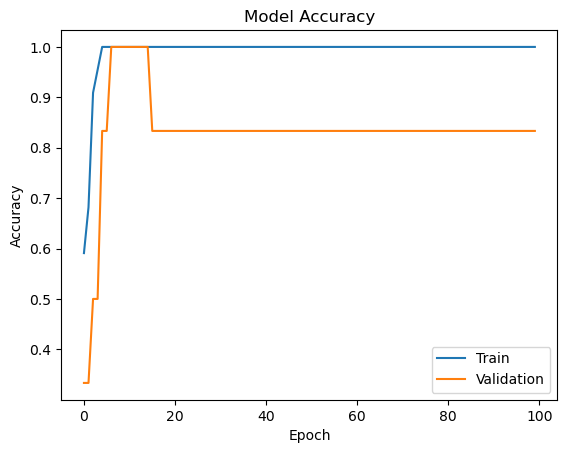

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Corrected key name to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [43]:
model3 = Sequential()
model3.add(Dense(1028,activation='relu',input_dim=X_train.shape[1]))
model3.add(Dense(512,activation='relu'))
model3.add(Dense(256,activation='relu'))
model3.add(Dense(2,activation='sigmoid'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1028)              106912    
                                                                 
 dense_15 (Dense)            (None, 512)               526848    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 2)                 514       
                                                                 
Total params: 765602 (2.92 MB)
Trainable params: 765602 (2.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model3.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 1s - loss: 0.6868 - accuracy: 0.4545 - val_loss: 0.6910 - val_accuracy: 0.3333 - 525ms/epoch - 263ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5712 - accuracy: 0.9545 - val_loss: 0.6409 - val_accuracy: 0.5000 - 49ms/epoch - 24ms/step
Epoch 3/100
2/2 - 0s - loss: 0.4380 - accuracy: 1.0000 - val_loss: 0.5507 - val_accuracy: 1.0000 - 49ms/epoch - 24ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2839 - accuracy: 1.0000 - val_loss: 0.4208 - val_accuracy: 1.0000 - 49ms/epoch - 24ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1378 - accuracy: 1.0000 - val_loss: 0.2827 - val_accuracy: 1.0000 - 51ms/epoch - 26ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 1.0000 - 49ms/epoch - 24ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 1.0000 - 51ms/epoch - 25ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.8333 - 46ms/epoch - 23ms/step
Epoch 9/100
2/2 - 0s -

In [45]:
model3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.3979 - accuracy: 0.8000


[0.3979277014732361, 0.800000011920929]

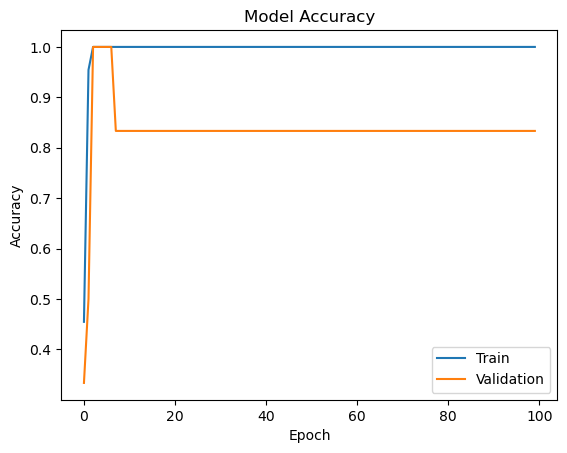

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Corrected key name to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [47]:
model4 = Sequential()
model4.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model4.add(Dense(32,activation='relu'))
model4.add(Dense(2,activation='sigmoid'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                6656      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 8802 (34.38 KB)
Trainable params: 8802 (34.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model4.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)

Epoch 1/100
2/2 - 0s - loss: 0.7079 - accuracy: 0.3636 - val_loss: 0.6595 - val_accuracy: 0.6667 - 422ms/epoch - 211ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6883 - accuracy: 0.5000 - val_loss: 0.6577 - val_accuracy: 0.6667 - 43ms/epoch - 21ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6730 - accuracy: 0.5455 - val_loss: 0.6560 - val_accuracy: 0.6667 - 18ms/epoch - 9ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6601 - accuracy: 0.5909 - val_loss: 0.6540 - val_accuracy: 0.6667 - 21ms/epoch - 10ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6470 - accuracy: 0.7273 - val_loss: 0.6515 - val_accuracy: 0.6667 - 32ms/epoch - 16ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6345 - accuracy: 0.8636 - val_loss: 0.6491 - val_accuracy: 0.6667 - 34ms/epoch - 17ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6237 - accuracy: 1.0000 - val_loss: 0.6469 - val_accuracy: 0.8333 - 14ms/epoch - 7ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6118 - accuracy: 1.0000 - val_loss: 0.6445 - val_accuracy: 0.8333 - 34ms/epoch - 17ms/step
Epoch 9/100
2/2 - 0s - l

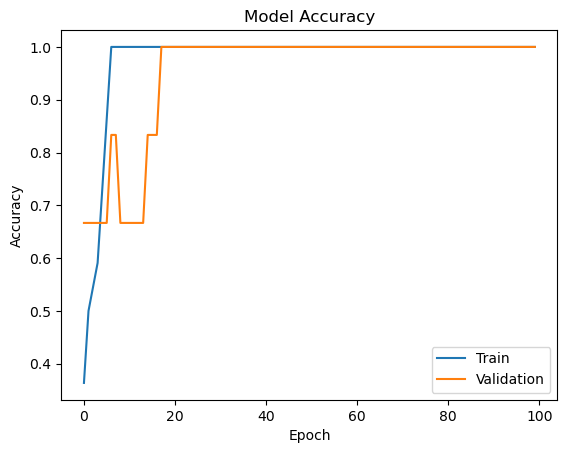

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Corrected key name to 'val_accuracy'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()